In [1]:
import numpy as np
from quantum_logical.test_freq import Test_freq
import matplotlib.pyplot as plt


In [2]:
a = 5.06167
c = 4.16829
b = 4.54944
s = 4.27515
center = a - ((a - b) / 2)
def get_array(a, b, c, s, option, divisions):
    array = []
    array.clear()
    if option == 'scale center':
        center_freq = a - ((a - c) / 2)
        for i in range(divisions):
            new_a = a - (i/(divisions - 1)) * (a - center_freq)
            new_b = b + (i/(divisions - 1)) * np.abs(b - center_freq)
            new_c = c + (i/(divisions - 1)) * np.abs(c - center_freq)
            new_s = s + (i/(divisions - 1)) * np.abs(s - center_freq)
            array.append([new_a, new_b, new_c, new_s])
    elif option == 'snail scan':
        snail = np.linspace(a, c, divisions)
        for s in snail:
            array.append([a, b, c, s])
    elif option == 'ratio conservation':
        das = a - s
        dbs = b - s
        dcs = c - s
        per = np.linspace(0, 1, divisions)
        for p in per:
            a_new = (p * das) + s
            b_new = (p * dbs) + s
            c_new = (p * dcs) + s
            array.append([a_new, b_new, c_new, s])
    return array

In [3]:
freqs = get_array(a = a, b = b, c = c, s = s, option='scale center', divisions=15)
freqs[0]

[5.06167, 4.54944, 4.16829, 4.27515]

In [4]:
fids = []
fids.clear()
store = []

In [5]:
fids = []
fids.clear()
store = []
for i in range(len(freqs) - 1):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9954
 Total run time:  81.41s*] Elapsed 81.00s / Remaining 00:00:00:00
0.9825246802446513
Found overlap with eigenstate by 0.9955
 [**       10%           ] Elapsed 12.43s / Remaining 00:00:01:51

In [ ]:
# making the array of the jump toward middle coefficient 
sp = np.linspace(a-c, 0, 15)
re = list(reversed(sp[1:15]))
re

[0.0,
 0.06381285714285712,
 0.12762571428571423,
 0.19143857142857146,
 0.2552514285714287,
 0.3190642857142858,
 0.382877142857143,
 0.4466900000000002,
 0.5105028571428574,
 0.5743157142857146,
 0.6381285714285718,
 0.7019414285714289,
 0.7657542857142862,
 0.8295671428571433]

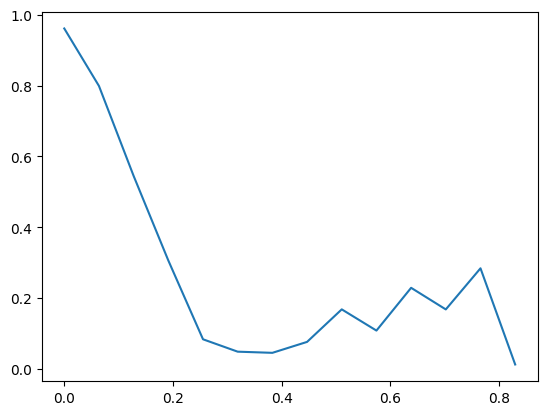

In [ ]:
fig, ax = plt.subplots()
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(re, store)

In [ ]:
freqs = get_array(a = a, b = b, c = c, s = s, option='snail scan', divisions=15)
freqs

[[5.06167, 4.54944, 4.16829, 5.06167],
 [5.06167, 4.54944, 4.16829, 4.997857142857143],
 [5.06167, 4.54944, 4.16829, 4.934044285714286],
 [5.06167, 4.54944, 4.16829, 4.8702314285714285],
 [5.06167, 4.54944, 4.16829, 4.806418571428572],
 [5.06167, 4.54944, 4.16829, 4.742605714285714],
 [5.06167, 4.54944, 4.16829, 4.678792857142858],
 [5.06167, 4.54944, 4.16829, 4.61498],
 [5.06167, 4.54944, 4.16829, 4.5511671428571425],
 [5.06167, 4.54944, 4.16829, 4.487354285714286],
 [5.06167, 4.54944, 4.16829, 4.423541428571428],
 [5.06167, 4.54944, 4.16829, 4.359728571428572],
 [5.06167, 4.54944, 4.16829, 4.295915714285714],
 [5.06167, 4.54944, 4.16829, 4.232102857142857],
 [5.06167, 4.54944, 4.16829, 4.16829]]

In [ ]:
fids = []
fids.clear()
store = []
store.clear()
for i in range(len(freqs)):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9943
 Total run time:  87.00s*] Elapsed 86.61s / Remaining 00:00:00:00
0.05662115029351507
Found overlap with eigenstate by 0.9943
 Total run time:  92.15s*] Elapsed 91.75s / Remaining 00:00:00:00
0.2295083141479549
Found overlap with eigenstate by 0.9942
 Total run time:  99.81s*] Elapsed 99.41s / Remaining 00:00:00:00
0.024530856937447262
Found overlap with eigenstate by 0.9941
 Total run time:  97.98s*] Elapsed 97.59s / Remaining 00:00:00:00
0.15470813783766063
Found overlap with eigenstate by 0.9939
 Total run time:  98.37s*] Elapsed 97.97s / Remaining 00:00:00:00
0.24846586898321982
Found overlap with eigenstate by 0.9935
 Total run time:  96.05s*] Elapsed 95.66s / Remaining 00:00:00:00
0.25485934665763343
Found overlap with eigenstate by 0.9927
 Total run time:  95.75s*] Elapsed 95.37s / Remaining 00:00:00:00
0.02247670587633242
Found overlap with eigenstate by 0.9886
 Total run time:  95.34s*] Elapsed 94.94s / Remaining 00:00:00:00
0.2820447959

In [ ]:
len(freqs) == len(fids)

True

In [ ]:
# array of the snails motion
new_loc = []
new_loc.clear()
for i in range(len(freqs)):
    new_loc.append(np.abs(a - freqs[i][3]) * 1000)

new_loc

[0.0,
 63.81285714285756,
 127.62571428571422,
 191.43857142857178,
 255.25142857142845,
 319.06428571428603,
 382.8771428571427,
 446.6900000000003,
 510.5028571428578,
 574.3157142857145,
 638.1285714285721,
 701.9414285714287,
 765.7542857142863,
 829.5671428571429,
 893.3800000000006]

Text(0.5, 1.0, 'location of the snail with respect to qubit 1')

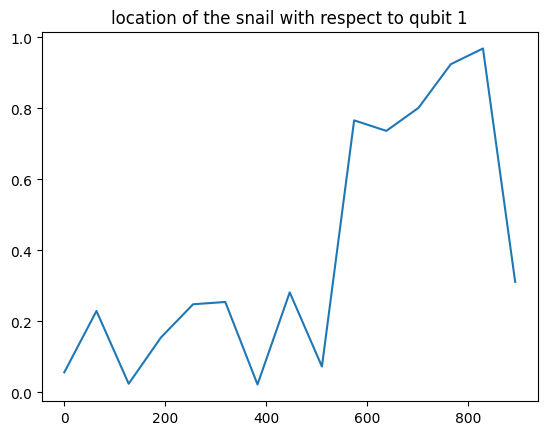

In [ ]:
fig, ax = plt.subplots()
# this is the location of the snail 
# this is with no added detuning but that is not really necessary since this is kind of plain as day
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(new_loc, store)
ax.set_title("location of the snail with respect to qubit 1")

In [5]:
freqs = get_array(a = a, b = b, c = c, s = s, option='ratio conservation', divisions=20)
freqs

[[4.27515, 4.27515, 4.27515, 4.27515],
 [4.316545789473684, 4.289586315789474, 4.269525789473684, 4.27515],
 [4.3579415789473686, 4.304022631578947, 4.263901578947368, 4.27515],
 [4.399337368421053, 4.318458947368421, 4.258277368421052, 4.27515],
 [4.440733157894737, 4.332895263157894, 4.252653157894737, 4.27515],
 [4.482128947368421, 4.347331578947369, 4.247028947368421, 4.27515],
 [4.523524736842106, 4.361767894736842, 4.241404736842105, 4.27515],
 [4.56492052631579, 4.376204210526316, 4.235780526315789, 4.27515],
 [4.606316315789474, 4.3906405263157895, 4.230156315789474, 4.27515],
 [4.6477121052631585, 4.405076842105263, 4.224532105263158, 4.27515],
 [4.689107894736842, 4.419513157894737, 4.218907894736842, 4.27515],
 [4.730503684210526, 4.43394947368421, 4.213283684210526, 4.27515],
 [4.77189947368421, 4.448385789473684, 4.207659473684211, 4.27515],
 [4.813295263157895, 4.462822105263157, 4.202035263157895, 4.27515],
 [4.854691052631579, 4.477258421052631, 4.1964110526315785, 4.27

In [6]:
fids = []
fids.clear()
store = []
store.clear()
for i in range(1, len(freqs)):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9987
 [*         3%           ] Elapsed 9.30s / Remaining 00:00:05:00

In [ ]:
x_space = []
x_space.clear()
for i in range(len(freqs)):
    qubit1 = freqs[i][0]
    qubit2 = freqs[i][1]
    qubit3 = freqs[i][2]
    qubit1_qubit2 = np.abs(qubit1 - qubit2)
    qubit1_qubit3 = np.abs(qubit1 - qubit3)
    qubit2_qubit3 = np.abs(qubit2 - qubit3)
    if qubit1_qubit2 < qubit1_qubit3 and qubit1_qubit2 < qubit2_qubit3:
        x_space.append(qubit1_qubit2)
    elif qubit1_qubit3 < qubit1_qubit2 and qubit1_qubit3 < qubit2_qubit3:
        x_space.append(qubit1_qubit3)
    elif qubit2_qubit3 < qubit1_qubit2 and qubit2_qubit3 < qubit1_qubit3:
        x_space.append(qubit2_qubit3)

x_space

[0.02722499999999961,
 0.05445000000000011,
 0.08167500000000061,
 0.10890000000000022,
 0.13612499999999983,
 0.16335000000000033,
 0.19057500000000083,
 0.21779999999999955,
 0.24502499999999916,
 0.27224999999999966,
 0.29947500000000016,
 0.32669999999999977,
 0.3539249999999994,
 0.3811499999999999]

Text(0.5, 1.0, 'fidelity vs minimum separation between qubit-qubit gates')

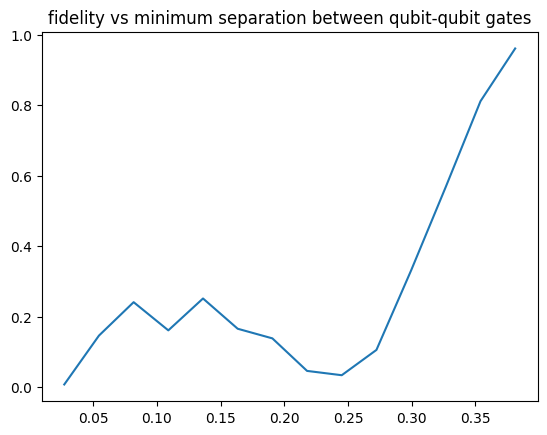

In [ ]:
fig, ax = plt.subplots()
# this is the location of the snail 
# this is with no added detuning but that is not really necessary since this is kind of plain as day
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(x_space, store)
ax.set_title("fidelity vs minimum separation between qubit-qubit gates")